<a href="https://colab.research.google.com/github/Gklimo/IHC-BERT/blob/main/marker_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pr_all_rep = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/MSc_BERT/pr_all_rep_bert_descr.csv')
pr_all_rep_true = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/MSc_BERT/pr_all_rep_true_descr.csv')

In [ ]:
len(pr_all_rep_true)

1454

In [ ]:
pr_all_rep=pr_all_rep.sort_values('Report#', ascending = True).reset_index().drop(['index','Unnamed: 0'], axis=1)
pr_all_rep_true=pr_all_rep_true.sort_values('Report#', ascending = True).reset_index().drop(['index','Unnamed: 0'], axis=1)

In [ ]:
pr_all_rep

,Report#,Tokens,Labels,Report,CD45-pos,CD45-neg,AE1/AE3-pos,AE1/AE3-neg,CD20-pos,CD20-neg,...,cytokeratin20-pos,cytokeratin20-neg,Cd10-pos,Cd10-neg,Cam5.2-pos,Cam5.2-neg,CK19-pos,CK19-neg,HER-pos,HER-neg
0,0,"['[CLS]', 'This', 'liver', 'biopsy', 'shows', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...",This liver biopsy shows contains numerous cell...,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0,0.0,0.0,0,0.0,0,0.0,0
1,1,"['[CLS]', 'Tissue', 'core', 'biopsy', 'shows',...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...",Tissue core biopsy shows diffuse infiltration ...,1.0,0.0,0.0,1.0,0.0,0.0,...,0,0.0,0,0.0,0.0,0,0.0,0,0.0,0
2,2,"['[CLS]', 'Excised', 'lymph', 'nodes', 'showin...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...",Excised lymph nodes showing a striking histolo...,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0.0,0,0.0,0.0,0,0.0,0,0.0,0
3,3,"['[CLS]', 'Sections', 'shows', 'fragmented', '...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...",Sections shows fragmented bone marrow trephine...,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0.0,0,0.0,0.0,0,0.0,0,0.0,0
4,4,"['[CLS]', 'Sections', 'show', 'a', 'core', 'bi...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...",Sections show a core biopsy of tissue in which...,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0,0.0,0.0,0,0.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,1450,"['[CLS]', 'Sections', 'show', 'fragments', 'of...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...",Sections show fragments of fibromuscular strom...,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0.0,0,0.0,0.0,0,0.0,0,0.0,0
1450,1451,"['[CLS]', 'Core', 'biopsies', 'of', 'lymph', '...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...",Core biopsies of lymph node showing effacement...,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0,0.0,0.0,0,0.0,0,0.0,0
1451,1452,"['[CLS]', 'These', 'are', 'core', 'biopsies', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...",These are core biopsies of lymphoid tissue sho...,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0.0,0,0.0,0.0,0,0.0,0,0.0,0
1452,1453,"['[CLS]', 'These', 'are', 'core', 'biopsies', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...",These are core biopsies of skeletal muscle sho...,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0,0.0,0.0,0,0.0,0,0.0,0


In [ ]:
pr_all_rep_true

,Report#,Words,True_Tags,Report,CD45-pos,CD45-neg,AE1/AE3-pos,AE1/AE3-neg,CD20-pos,CD20-neg,...,Cerb-B2-pos,Cerb-B2-neg,cytokeratin20-pos,cytokeratin20-neg,Cd10-pos,Cd10-neg,Cam5.2-pos,Cam5.2-neg,CK19-pos,CK19-neg
0,0,"['This', 'liver', 'biopsy', 'shows', 'contains...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...",This liver biopsy shows contains numerous cell...,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0
1,1,"['Tissue', 'core', 'biopsy', 'shows', 'diffuse...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...",Tissue core biopsy shows diffuse infiltration ...,1.0,0.0,0.0,1.0,0.0,0.0,...,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0
2,2,"['Excised', 'lymph', 'nodes', 'showing', 'a', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...",Excised lymph nodes showing a striking histolo...,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0
3,3,"['Sections', 'shows', 'fragmented', 'bone', 'm...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...",Sections shows fragmented bone marrow trephine...,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0
4,4,"['Sections', 'show', 'a', 'core', 'biopsy', 'o...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...",Sections show a core biopsy of tissue in which...,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,1450,"['Sections', 'show', 'fragments', 'of', 'fibro...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...",Sections show fragments of fibromuscular strom...,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0
1450,1451,"['Core', 'biopsies', 'of', 'lymph', 'node', 's...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...",Core biopsies of lymph node showing effacement...,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0
1451,1452,"['These', 'are', 'core', 'biopsies', 'of', 'ly...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...",These are core biopsies of lymphoid tissue sho...,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0
1452,1453,"['These', 'are', 'core', 'biopsies', 'of', 'sk...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...",These are core biopsies of skeletal muscle sho...,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0


In [ ]:
tru_cols = list(pr_all_rep_true.columns)
bert_cols = list(pr_all_rep.columns)

In [ ]:
del tru_cols[0]
del bert_cols[0]
del tru_cols[0]
del bert_cols[0]
del tru_cols[0]
del bert_cols[0]
del tru_cols[0]
del bert_cols[0]

In [ ]:
markers_true = []
for m in tru_cols :
  m = m[:-4]
  if m not in markers_true:
    markers_true.append(m)
markers_true

['CD45',
 'AE1/AE3',
 'CD20',
 'CD10',
 'PSMA',
 'PSA',
 'ER',
 'synaptophysin',
 'HER2',
 'CD79',
 'CD30',
 'EBER',
 'CD79a',
 'BCL-2',
 'CD1a',
 'TdT',
 'GATA3',
 'c-Myc',
 'MNF116',
 'CD33',
 'CD3',
 'CD5',
 'SOX-11',
 'Cyclin-D1',
 'CK5',
 'p16',
 'BCL6',
 'MLH1',
 'BRAF',
 'cyclinD1',
 'CD34',
 'Alk1',
 'perforin',
 'TTF-1',
 'ALK',
 'AE1/3',
 'IgG',
 'CD35',
 'CD56',
 'CD19',
 'Pax8',
 'P16',
 'MPO',
 'MUM-1',
 'CD138',
 'S100',
 'SMA',
 'MSH6',
 'CD25',
 'CD4',
 'MUM1',
 'DBA44',
 'CyclinD1',
 'nan',
 'IgM',
 'CD23',
 'EBV',
 'bcl-6',
 'IgG4',
 'IgD',
 'bcl2',
 'PD-L1',
 'EMA',
 'Her2',
 'Her-2',
 'PR',
 'CD31',
 'E-cadherin',
 'HER-2',
 'CK7',
 'CD15',
 'PD-1',
 'BCL2',
 'Vimentin',
 'WT1',
 'p53',
 'CD68',
 'CD2',
 'P53',
 'factorXIIIa',
 'Bcl2',
 'cytokeratins',
 'Keratin',
 'CD22',
 'cytokeratin',
 'Helicobacter',
 'CD61',
 'bcl6',
 'CD71',
 'CD21',
 'BCL-6',
 'CMYC',
 'CD117',
 'Bcl6',
 'c-myc',
 'PAX8',
 'C-MYC',
 'kappa',
 'Mum1',
 'Oct3/4',
 'BerEP4',
 'TTF1',
 'bcl-2',


In [ ]:
df_mt = pd.DataFrame(columns = markers_true)

df_t = pd.concat([pr_all_rep_true, df_mt], ignore_index=True)

In [ ]:
for i, r in df_t.iterrows():
  for m in markers_true:
    if df_t[m+'-pos'][i] == 1:
      df_t[m][i] = 'POSITIVE'
    elif df_t[m+'-neg'][i] ==1:
      df_t[m][i] = 'NEGATIVE'
    else :
      df_t[m][i] = 'NONE'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_t.head(1)

,Report#,Words,True_Tags,Report,CD45-pos,CD45-neg,AE1/AE3-pos,AE1/AE3-neg,CD20-pos,CD20-neg,...,Ecadherin,CerbB2,ECadherin,DOG1,Melan-A,Cerb-B2,cytokeratin20,Cd10,Cam5.2,CK19
0,0.0,"['This', 'liver', 'biopsy', 'shows', 'contains...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...",This liver biopsy shows contains numerous cell...,0.0,0.0,0.0,0.0,0.0,0.0,...,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE


In [ ]:
markers_bert = []
for m in bert_cols :
  m = m[:-4]
  if m not in markers_bert:
    markers_bert.append(m)
markers_bert

['CD45',
 'AE1/AE3',
 'CD20',
 'CD10',
 'PSMA',
 'PSA',
 'ER',
 'synaptophysin',
 'HER2',
 'CD79',
 'CD30',
 'EBER',
 'CD79a',
 'BCL-2',
 'CD1a',
 'TdT',
 'GATA3',
 'c-Myc',
 'MNF116',
 'CD33',
 'CD3',
 'CD5',
 'SOX-11',
 'Cyclin-D1',
 'CK5',
 'p16',
 'BCL6',
 'MLH1',
 'BRAF',
 'cyclinD1',
 'CD34',
 'Alk1',
 'perforin',
 'TTF-1',
 'ALK',
 'AE1/3',
 'IgG',
 'CD35',
 'CD56',
 'CD19',
 'Pax8',
 'P16',
 'MPO',
 'MUM-1',
 'CD138',
 'S100',
 'SMA',
 'MSH6',
 'CD25',
 'CD4',
 'MUM1',
 'DBA44',
 'CyclinD1',
 'IgM',
 'CD23',
 'EBV',
 'bcl-6',
 'IgG4',
 'IgD',
 'bcl2',
 'PD-L1',
 'EMA',
 'Her2',
 'PR',
 'Her-2',
 'CD31',
 'E-cadherin',
 'HER-2',
 'CK7',
 'CD117',
 'CD15',
 'PD-1',
 'BCL2',
 'Vimentin',
 'WT1',
 'p53',
 'lambda',
 'CD68',
 'CD2',
 'P53',
 'factorXIIIa',
 'Bcl2',
 'cytokeratins',
 'Keratin',
 'CD22',
 'cytokeratin',
 'CD61',
 'bcl6',
 'CD71',
 'CD21',
 'BCL-6',
 'CMYC',
 'Bcl6',
 'c-myc',
 'PAX8',
 'CK20',
 'C-MYC',
 'kappa',
 'Mum1',
 'Oct3/4',
 'BerEP4',
 'TTF1',
 'bcl-2',
 'Nap

In [ ]:
df_mb = pd.DataFrame(columns = markers_bert)

df_b = pd.concat([pr_all_rep, df_mb], ignore_index=True)

In [ ]:
for i, r in df_b.iterrows():
  for m in markers_bert:
    if df_b[m+'-pos'][i] == 1:
      df_b[m][i] = 'POSITIVE'
    elif df_b[m+'-neg'][i] ==1:
      df_b[m][i] = 'NEGATIVE'
    else :
      df_b[m][i] = 'NONE'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_b['Report#'] = df_b['Report#'].astype(str)
df_t['Report#'] = df_t['Report#'].astype(str)

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn.metrics import f1_score, precision_score,recall_score


for t, b in zip(tru_cols, bert_cols):
  if b in tru_cols:

    confusion_matrix = pd.crosstab( pr_all_rep_true[b], pr_all_rep[b],rownames=['Actual'], colnames=['Predicted'])
    #print (confusion_matrix)
    sn.heatmap(confusion_matrix, annot=True,norm=LogNorm())
    plt.title(str(b).upper()+' Confusion Matrix')
    plt.show()

    print(f'Performance metrics for {b}')
    precision = precision_score(pr_all_rep_true[b],pr_all_rep[b], zero_division=0)
    print('Precision score: {0:0.2f}'.format(precision))

    recall = recall_score(pr_all_rep_true[b],pr_all_rep[b], zero_division=0)
    print('Recall score: {0:0.2f}'.format(recall))

    f1 = f1_score(pr_all_rep_true[b],pr_all_rep[b], zero_division=0)
    print('f1 scre: {0:0.2f}\n'.format(f1))

In [ ]:
results = pd.DataFrame(columns = ['Marker','Precision','Recall', 'F1'])
results

,Marker,Precision,Recall,F1


In [ ]:
results

In [ ]:
results = pd.DataFrame(columns = ['Marker','Precision','Recall', 'F1'])
for t, b in zip(markers_true, markers_bert):
  if b in markers_true:
   # print(f'Performance metrics for {b}')
    precision = precision_score(df_t[b],df_b[b], zero_division=0,average='macro')
    #print('Precision score: {0:0.2f}'.format(precision))

    recall = recall_score(df_t[b],df_b[b], zero_division=0,average='macro')
   # print('Recall score: {0:0.2f}'.format(recall))

    f1 = f1_score(df_t[b],df_b[b], zero_division=0,average='macro')
    #print('f1 scre: {0:0.2f}\n'.format(f1))
    df = pd.DataFrame({'Marker': [b],'Precision' : [precision],'Recall':[recall], 'F1': [f1]})
    print(df)
    
    results = results.append(df)

  Marker  Precision  Recall   F1
0   CD45        1.0     1.0  1.0
    Marker  Precision  Recall   F1
0  AE1/AE3        1.0     1.0  1.0
  Marker  Precision    Recall        F1
0   CD20   0.999724  0.998563  0.999142
  Marker  Precision    Recall       F1
0   CD10   0.994152  0.999761  0.99693
  Marker  Precision  Recall   F1
0   PSMA        1.0     1.0  1.0
  Marker  Precision  Recall   F1
0    PSA        1.0     1.0  1.0
  Marker  Precision    Recall        F1
0     ER   0.979167  0.956761  0.966237
          Marker  Precision  Recall   F1
0  synaptophysin        1.0     1.0  1.0
  Marker  Precision    Recall        F1
0   HER2   0.999298  0.892857  0.939684
  Marker  Precision  Recall   F1
0   CD79        1.0     1.0  1.0
  Marker  Precision    Recall       F1
0   CD30   0.987418  0.958333  0.97137
  Marker  Precision  Recall   F1
0   EBER        1.0     1.0  1.0
  Marker  Precision  Recall   F1
0  CD79a        1.0     1.0  1.0
  Marker  Precision    Recall        F1
0  BCL-2        

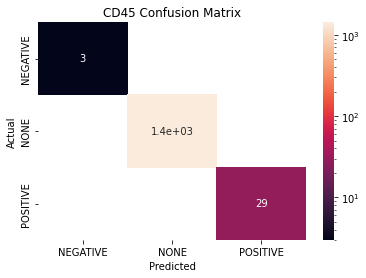

Performance metrics for CD45
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



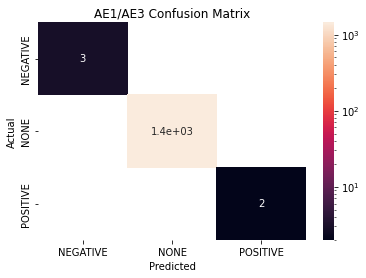

Performance metrics for AE1/AE3
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



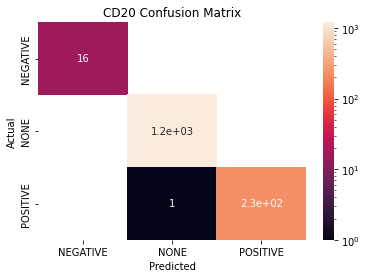

Performance metrics for CD20
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



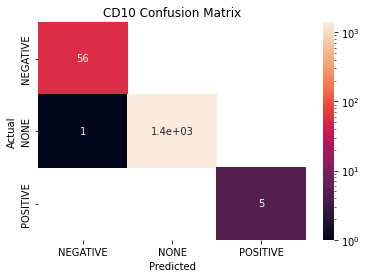

Performance metrics for CD10
Precision score: 0.99
Recall score: 1.00
f1 scre: 1.00



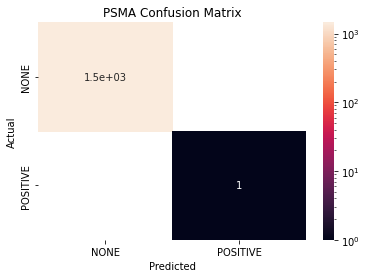

Performance metrics for PSMA
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



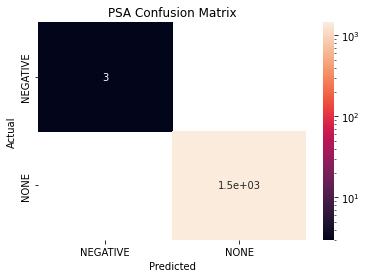

Performance metrics for PSA
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



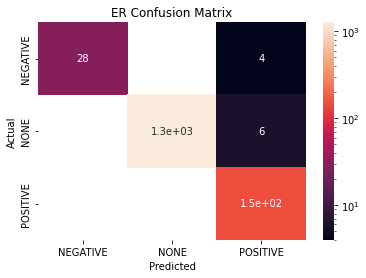

Performance metrics for ER
Precision score: 0.98
Recall score: 0.96
f1 scre: 0.97



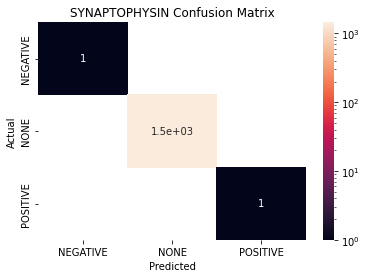

Performance metrics for synaptophysin
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



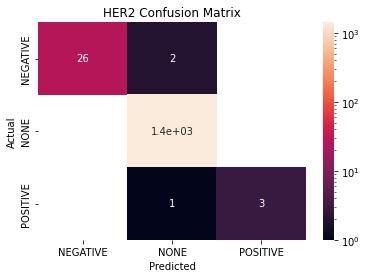

Performance metrics for HER2
Precision score: 1.00
Recall score: 0.89
f1 scre: 0.94



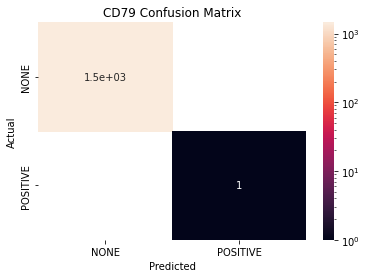

Performance metrics for CD79
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



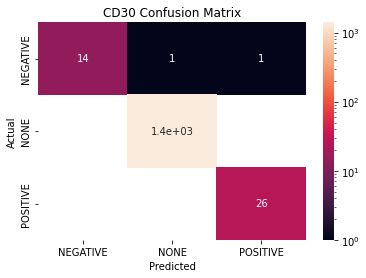

Performance metrics for CD30
Precision score: 0.99
Recall score: 0.96
f1 scre: 0.97



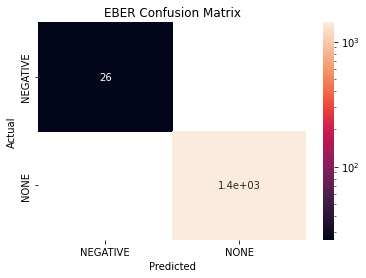

Performance metrics for EBER
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



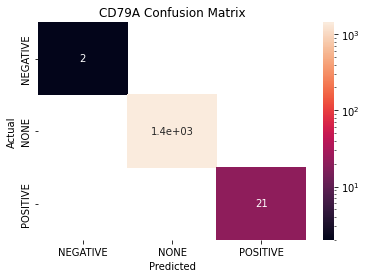

Performance metrics for CD79a
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



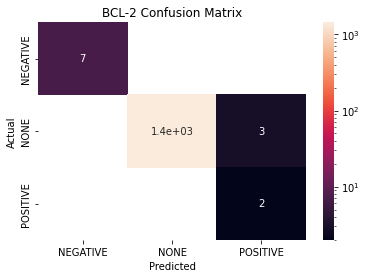

Performance metrics for BCL-2
Precision score: 0.80
Recall score: 1.00
f1 scre: 0.86



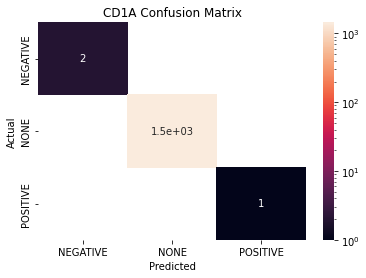

Performance metrics for CD1a
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



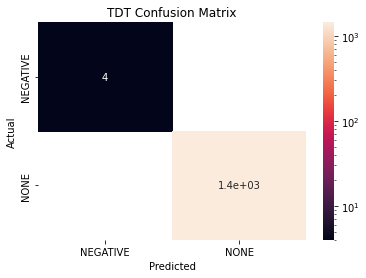

Performance metrics for TdT
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



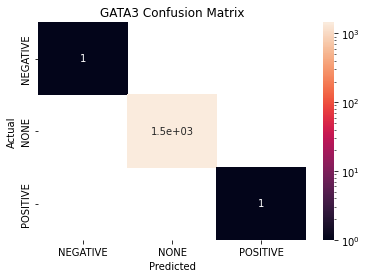

Performance metrics for GATA3
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



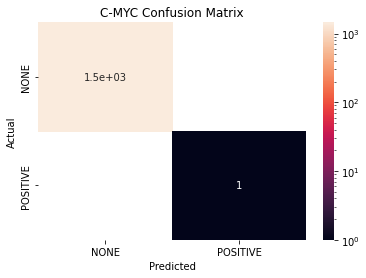

Performance metrics for c-Myc
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



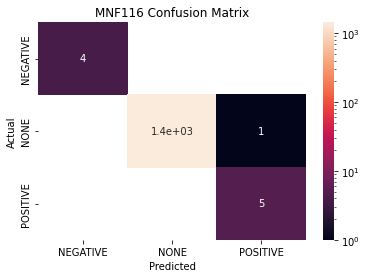

Performance metrics for MNF116
Precision score: 0.94
Recall score: 1.00
f1 scre: 0.97



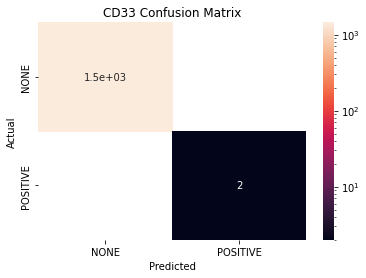

Performance metrics for CD33
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



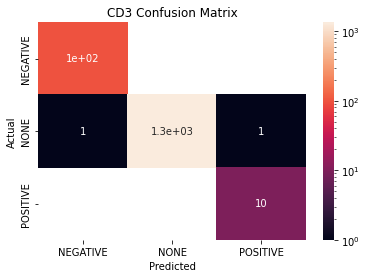

Performance metrics for CD3
Precision score: 0.97
Recall score: 1.00
f1 scre: 0.98



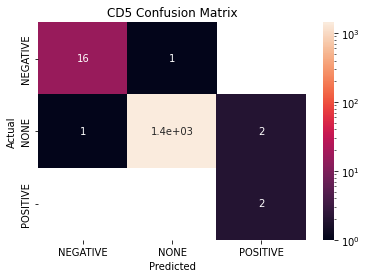

Performance metrics for CD5
Precision score: 0.81
Recall score: 0.98
f1 scre: 0.87



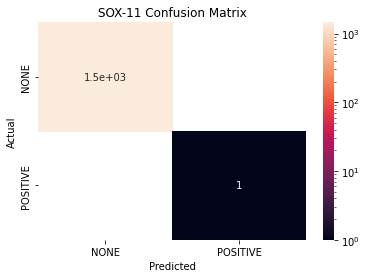

Performance metrics for SOX-11
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



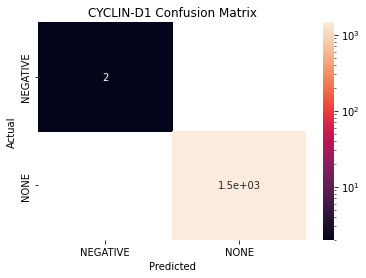

Performance metrics for Cyclin-D1
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



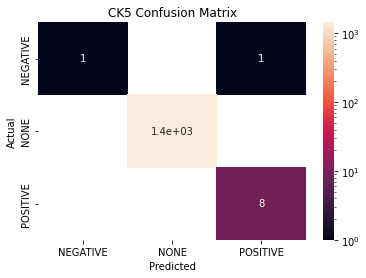

Performance metrics for CK5
Precision score: 0.96
Recall score: 0.83
f1 scre: 0.87



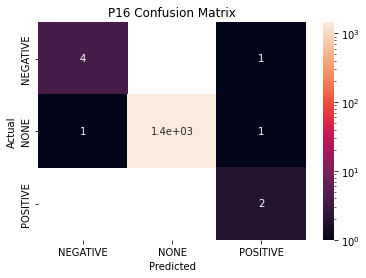

Performance metrics for p16
Precision score: 0.77
Recall score: 0.93
f1 scre: 0.82



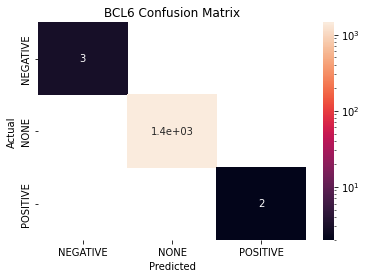

Performance metrics for BCL6
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



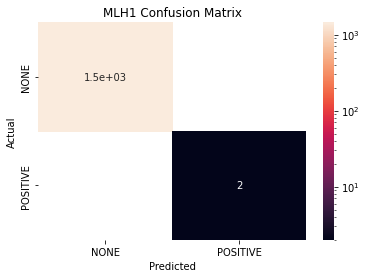

Performance metrics for MLH1
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



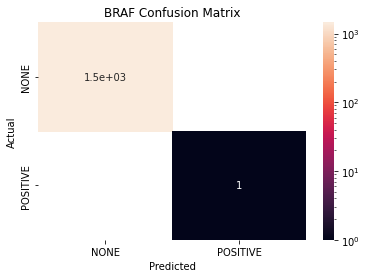

Performance metrics for BRAF
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



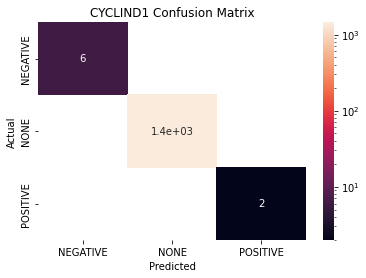

Performance metrics for cyclinD1
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



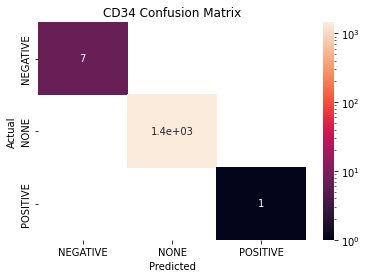

Performance metrics for CD34
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



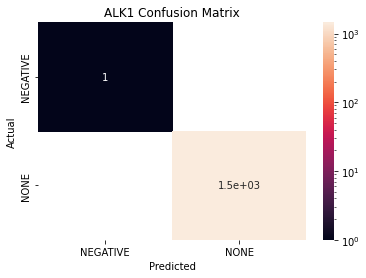

Performance metrics for Alk1
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



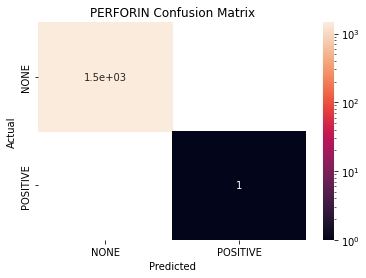

Performance metrics for perforin
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



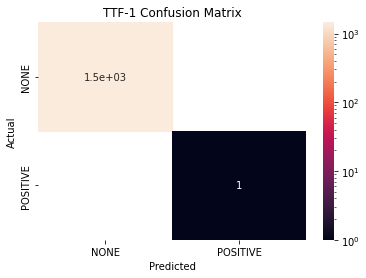

Performance metrics for TTF-1
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



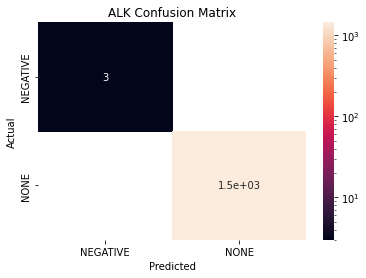

Performance metrics for ALK
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



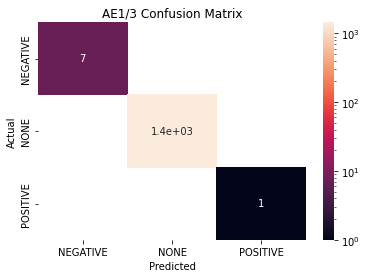

Performance metrics for AE1/3
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



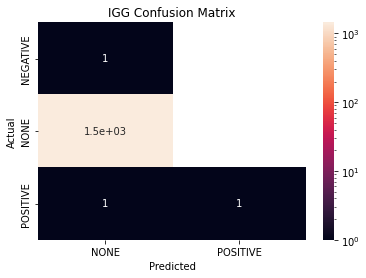

Performance metrics for IgG
Precision score: 0.67
Recall score: 0.50
f1 scre: 0.56



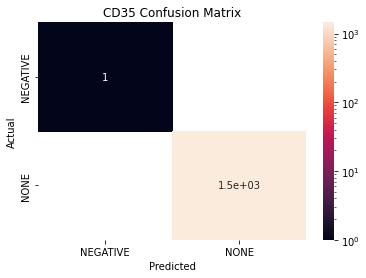

Performance metrics for CD35
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



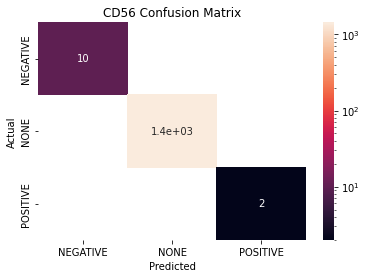

Performance metrics for CD56
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



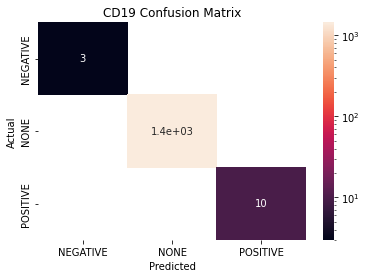

Performance metrics for CD19
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



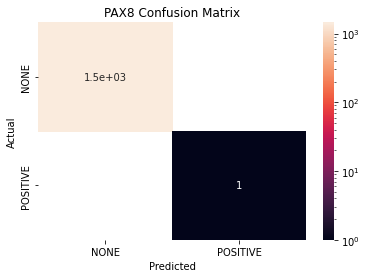

Performance metrics for Pax8
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



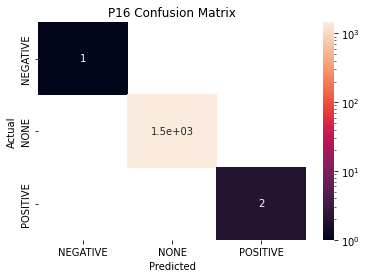

Performance metrics for P16
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



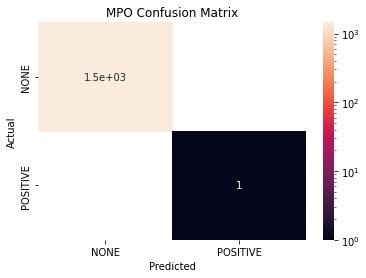

Performance metrics for MPO
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



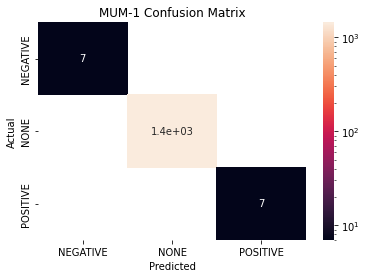

Performance metrics for MUM-1
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



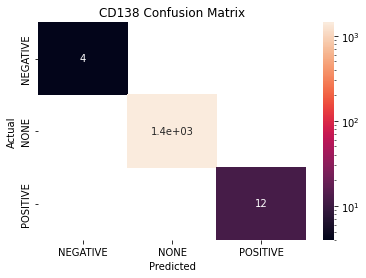

Performance metrics for CD138
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



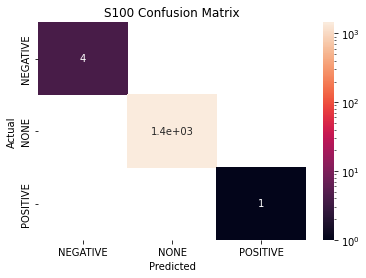

Performance metrics for S100
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



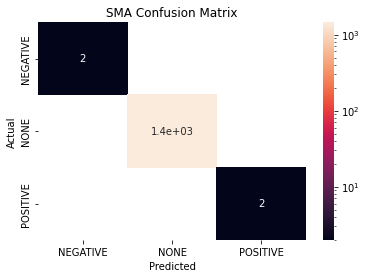

Performance metrics for SMA
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



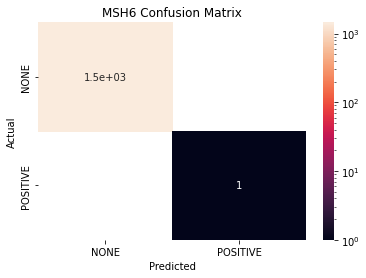

Performance metrics for MSH6
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



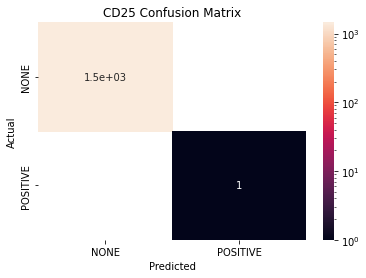

Performance metrics for CD25
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



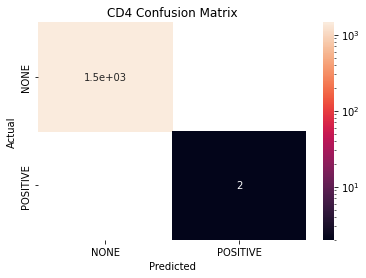

Performance metrics for CD4
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



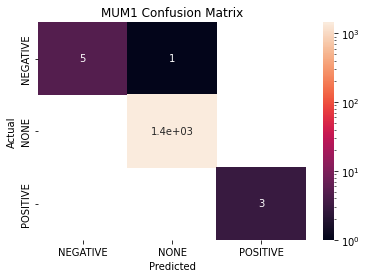

Performance metrics for MUM1
Precision score: 1.00
Recall score: 0.94
f1 scre: 0.97



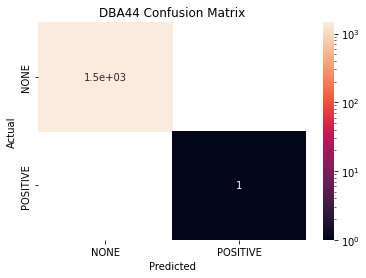

Performance metrics for DBA44
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



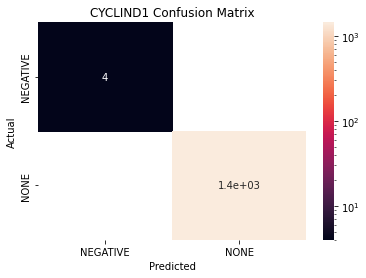

Performance metrics for CyclinD1
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



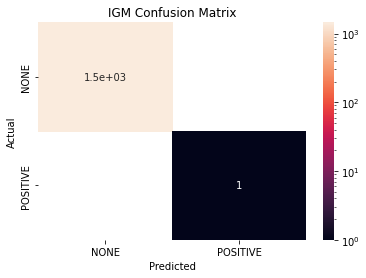

Performance metrics for IgM
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



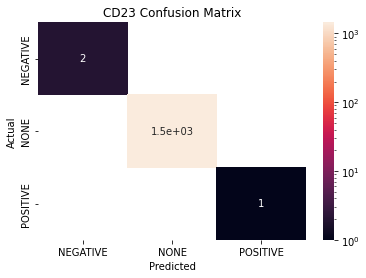

Performance metrics for CD23
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



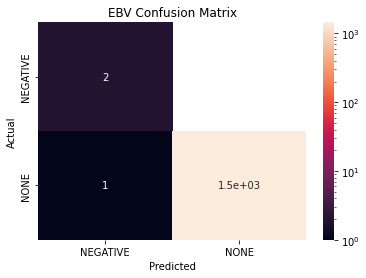

Performance metrics for EBV
Precision score: 0.83
Recall score: 1.00
f1 scre: 0.90



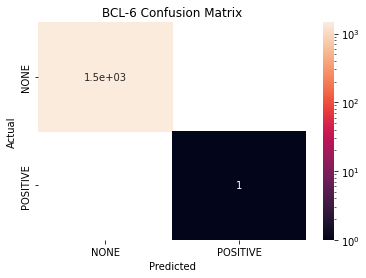

Performance metrics for bcl-6
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



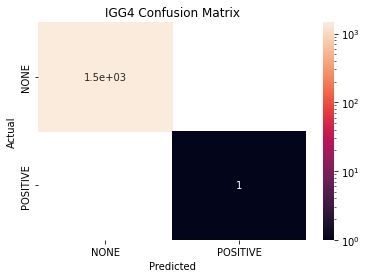

Performance metrics for IgG4
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



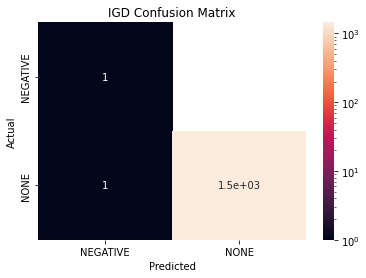

Performance metrics for IgD
Precision score: 0.75
Recall score: 1.00
f1 scre: 0.83



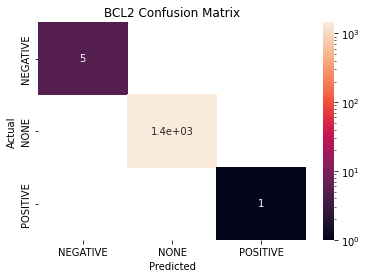

Performance metrics for bcl2
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



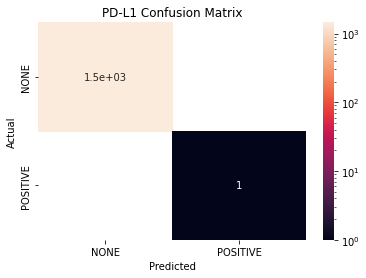

Performance metrics for PD-L1
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



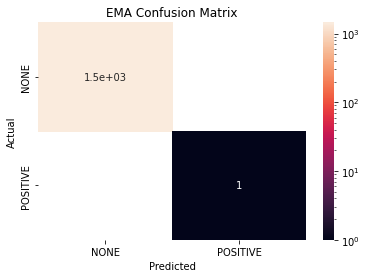

Performance metrics for EMA
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



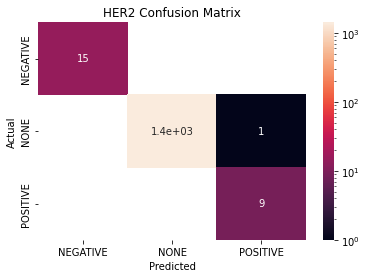

Performance metrics for Her2
Precision score: 0.97
Recall score: 1.00
f1 scre: 0.98



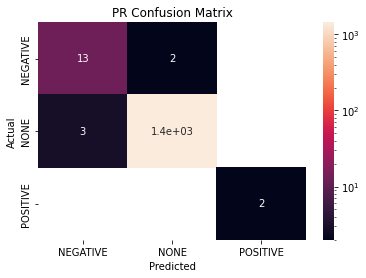

Performance metrics for PR
Precision score: 0.94
Recall score: 0.95
f1 scre: 0.95



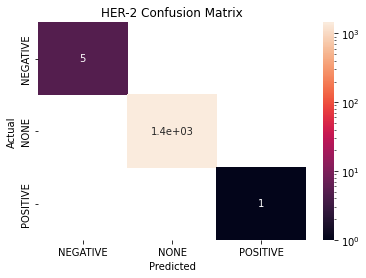

Performance metrics for Her-2
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



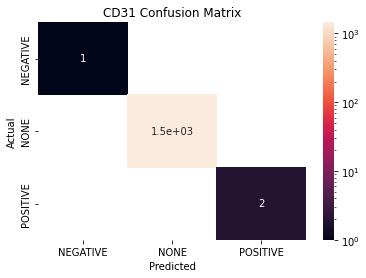

Performance metrics for CD31
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



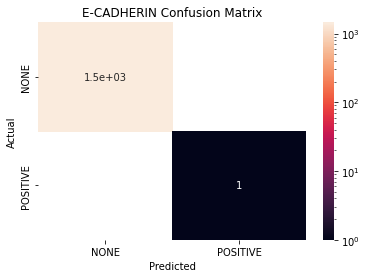

Performance metrics for E-cadherin
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



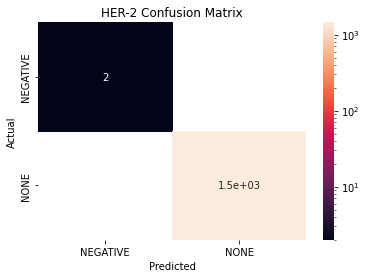

Performance metrics for HER-2
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



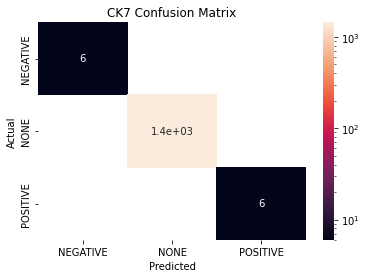

Performance metrics for CK7
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



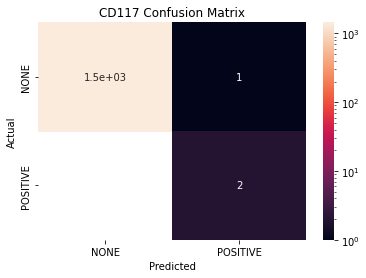

Performance metrics for CD117
Precision score: 0.83
Recall score: 1.00
f1 scre: 0.90



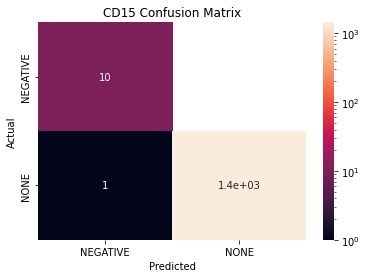

Performance metrics for CD15
Precision score: 0.95
Recall score: 1.00
f1 scre: 0.98



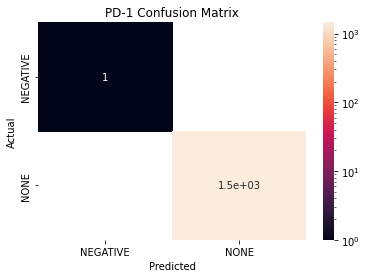

Performance metrics for PD-1
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



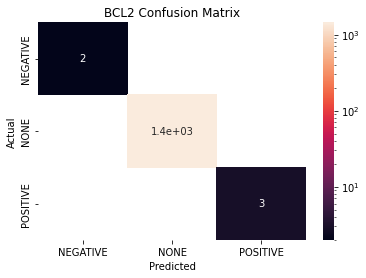

Performance metrics for BCL2
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



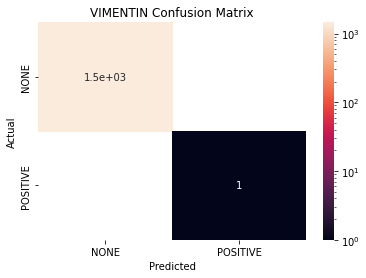

Performance metrics for Vimentin
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



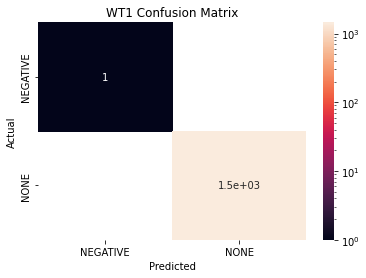

Performance metrics for WT1
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



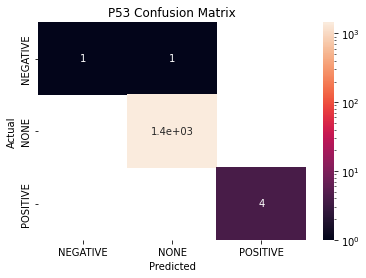

Performance metrics for p53
Precision score: 1.00
Recall score: 0.83
f1 scre: 0.89



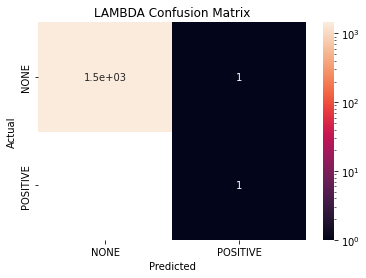

Performance metrics for lambda
Precision score: 0.75
Recall score: 1.00
f1 scre: 0.83



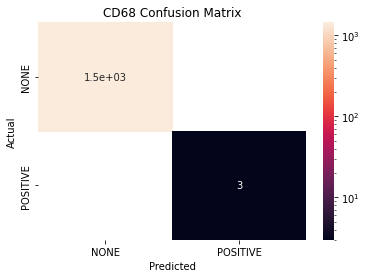

Performance metrics for CD68
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



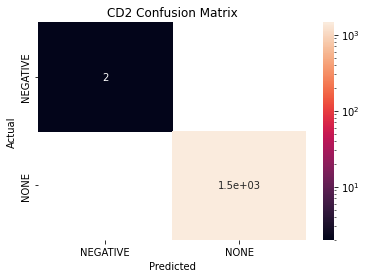

Performance metrics for CD2
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



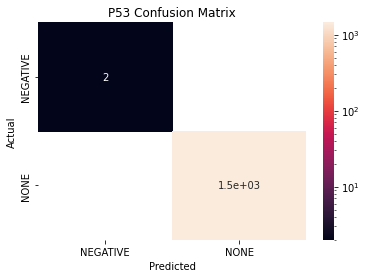

Performance metrics for P53
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



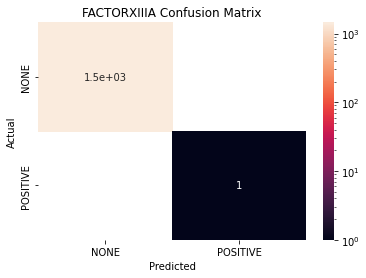

Performance metrics for factorXIIIa
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



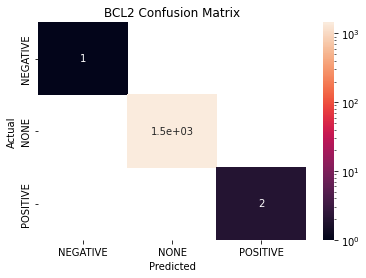

Performance metrics for Bcl2
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



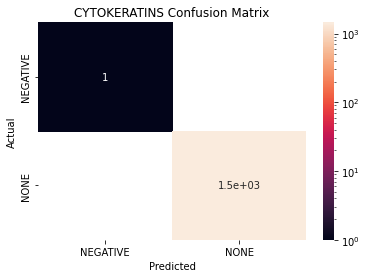

Performance metrics for cytokeratins
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



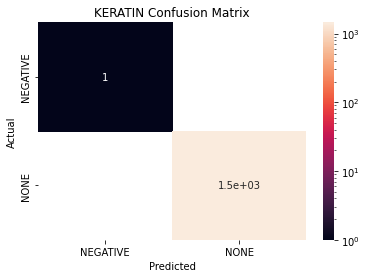

Performance metrics for Keratin
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



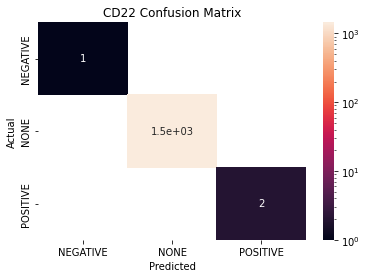

Performance metrics for CD22
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



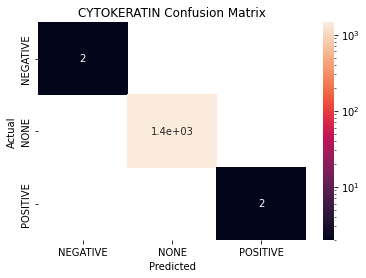

Performance metrics for cytokeratin
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



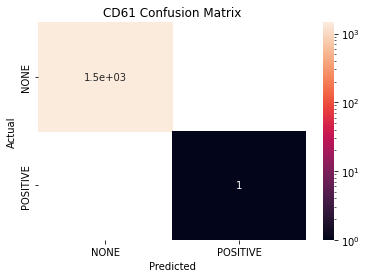

Performance metrics for CD61
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



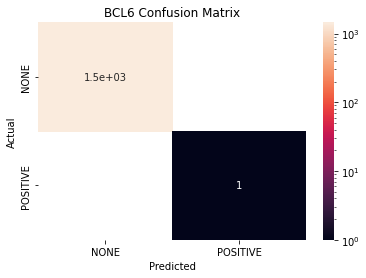

Performance metrics for bcl6
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



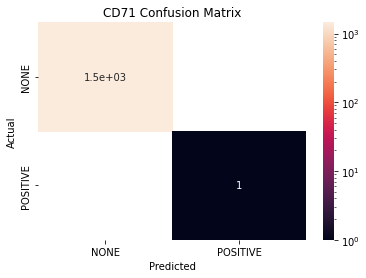

Performance metrics for CD71
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



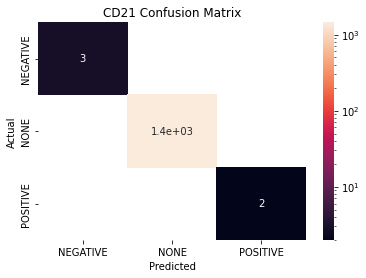

Performance metrics for CD21
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



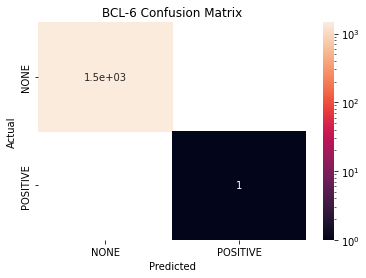

Performance metrics for BCL-6
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



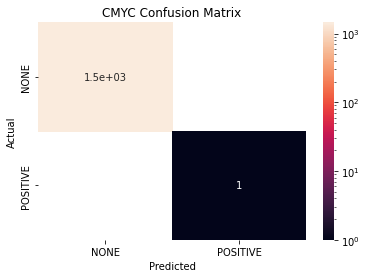

Performance metrics for CMYC
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



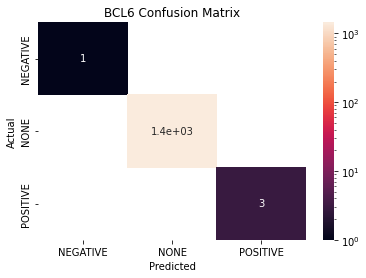

Performance metrics for Bcl6
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



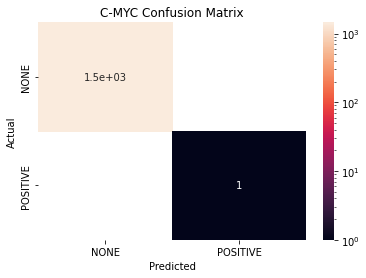

Performance metrics for c-myc
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



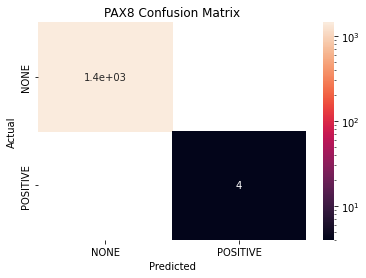

Performance metrics for PAX8
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



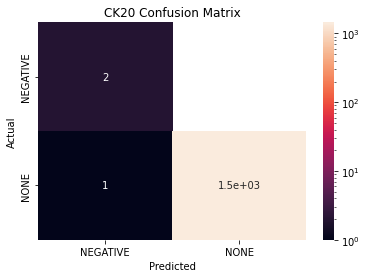

Performance metrics for CK20
Precision score: 0.83
Recall score: 1.00
f1 scre: 0.90



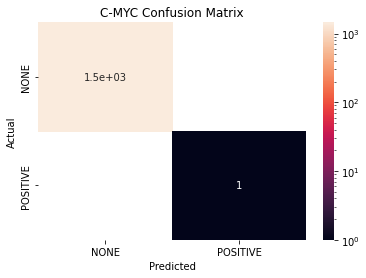

Performance metrics for C-MYC
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



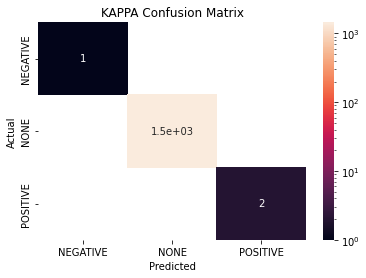

Performance metrics for kappa
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



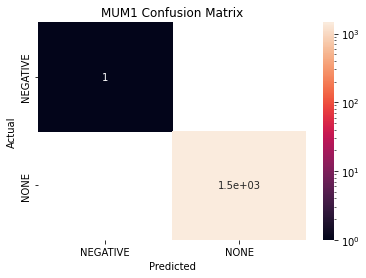

Performance metrics for Mum1
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



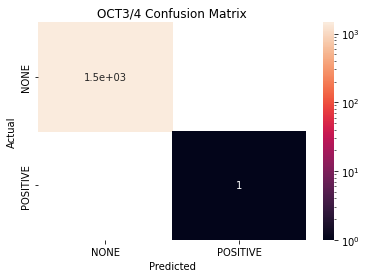

Performance metrics for Oct3/4
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



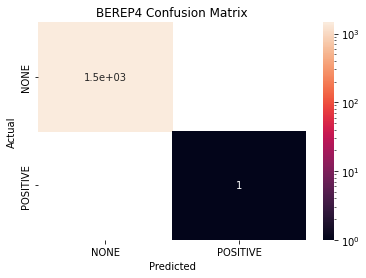

Performance metrics for BerEP4
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



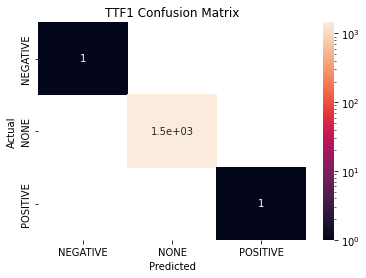

Performance metrics for TTF1
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



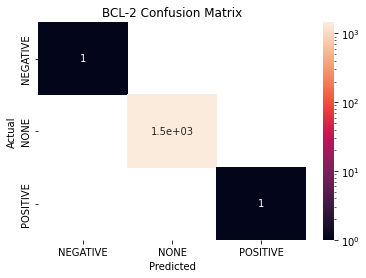

Performance metrics for bcl-2
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



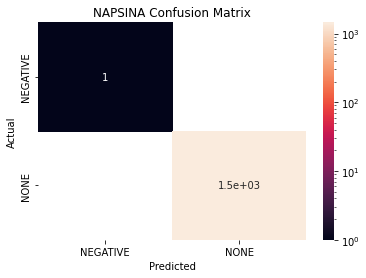

Performance metrics for NapsinA
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



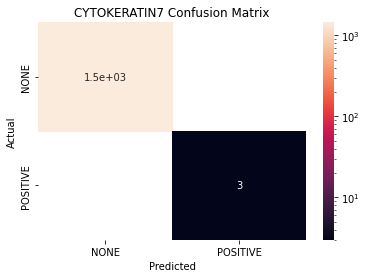

Performance metrics for cytokeratin7
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



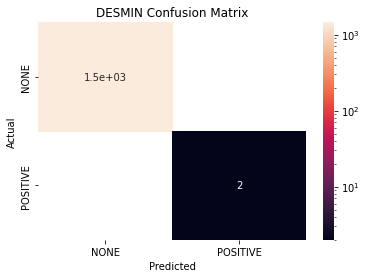

Performance metrics for desmin
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



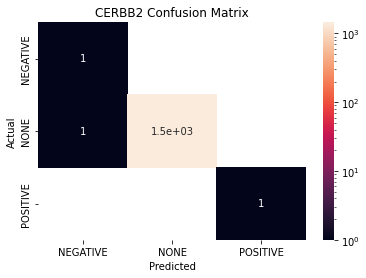

Performance metrics for CerbB2
Precision score: 0.83
Recall score: 1.00
f1 scre: 0.89



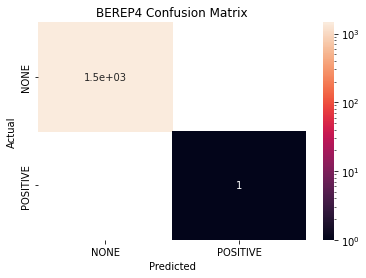

Performance metrics for BEREP4
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



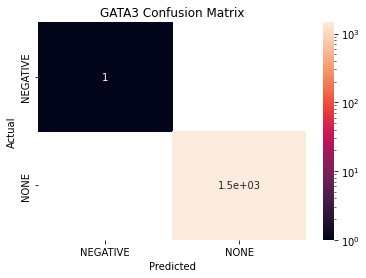

Performance metrics for Gata3
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



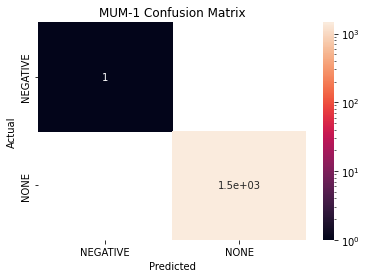

Performance metrics for Mum-1
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



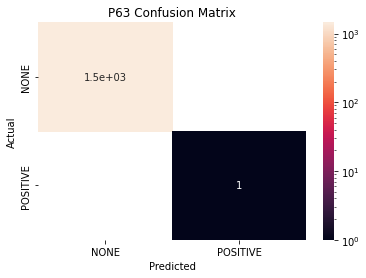

Performance metrics for p63
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



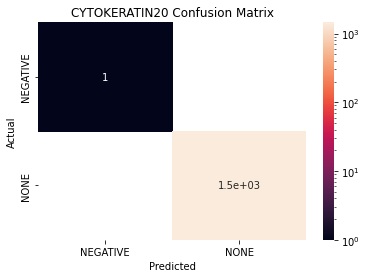

Performance metrics for Cytokeratin20
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



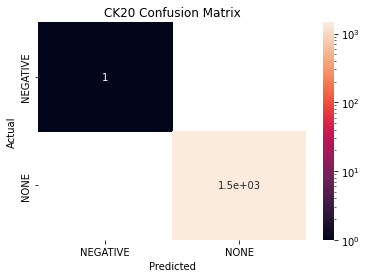

Performance metrics for ck20
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



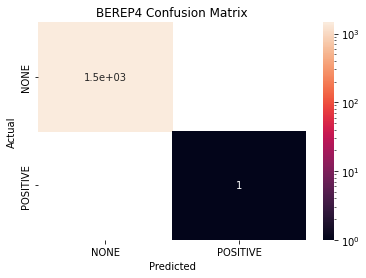

Performance metrics for BerEp4
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



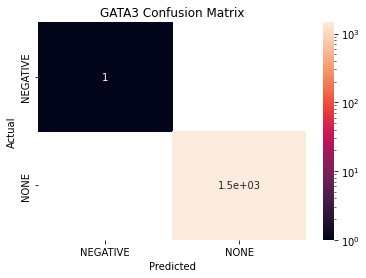

Performance metrics for gata3
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



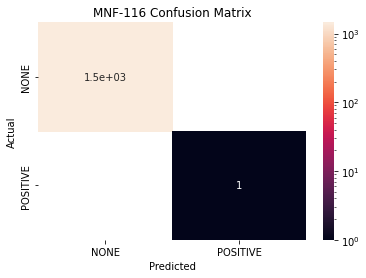

Performance metrics for MNF-116
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



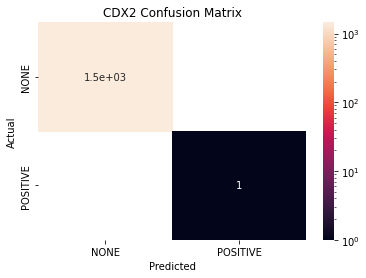

Performance metrics for CDX2
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



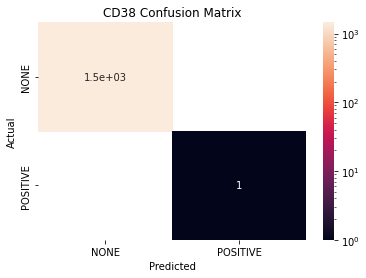

Performance metrics for CD38
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



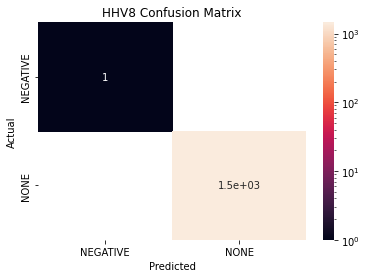

Performance metrics for HHV8
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



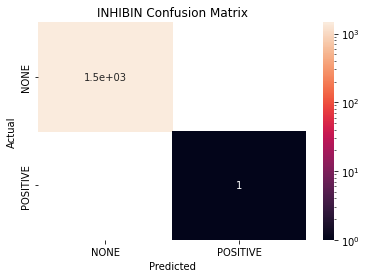

Performance metrics for inhibin
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



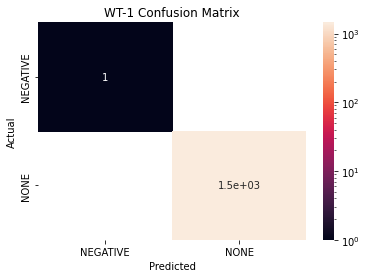

Performance metrics for WT-1
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



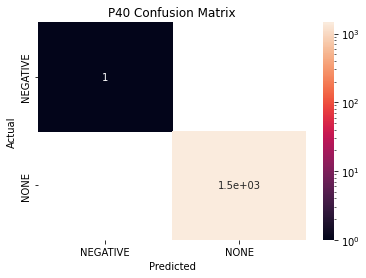

Performance metrics for p40
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



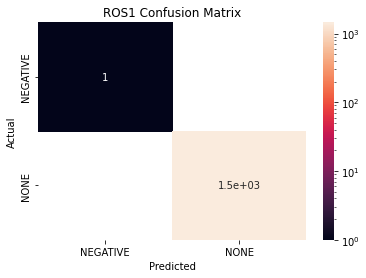

Performance metrics for ROS1
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



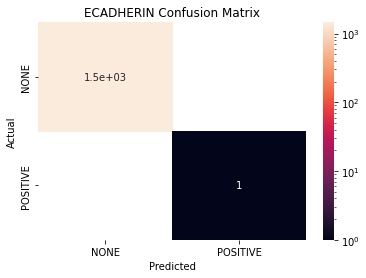

Performance metrics for Ecadherin
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



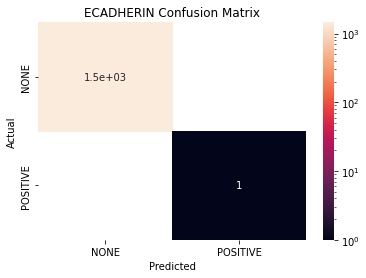

Performance metrics for ECadherin
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



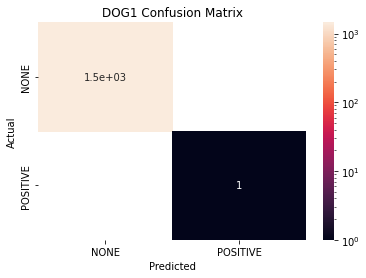

Performance metrics for DOG1
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



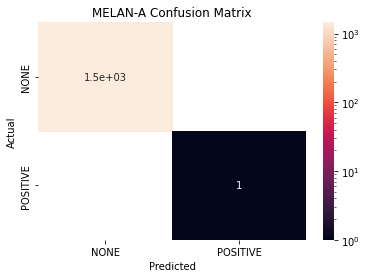

Performance metrics for Melan-A
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



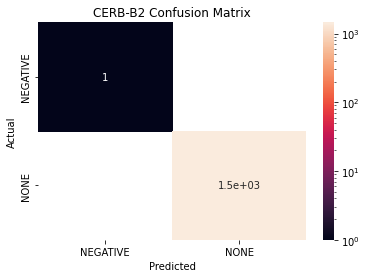

Performance metrics for Cerb-B2
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



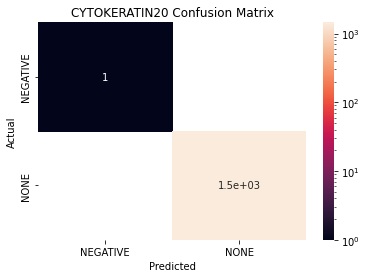

Performance metrics for cytokeratin20
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



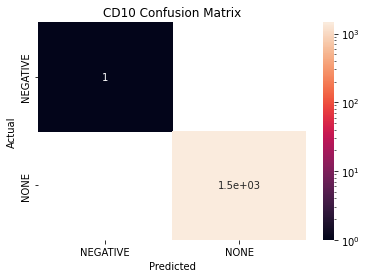

Performance metrics for Cd10
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



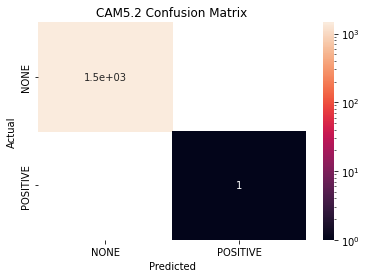

Performance metrics for Cam5.2
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



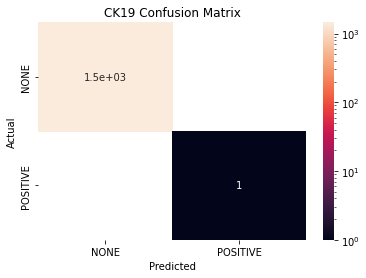

Performance metrics for CK19
Precision score: 1.00
Recall score: 1.00
f1 scre: 1.00



<Figure size 432x288 with 0 Axes>

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn.metrics import f1_score, precision_score,recall_score
results = pd.DataFrame(columns = ['Marker','Macro Precision','Macro Recall', 'Macro F1','Positive Precision','Positive Recall', 'Positive F1','Negative Precision','Negative Recall', 'Negative F1'])
n = 0
for b in markers_bert:
  if b in markers_true:

    confusion_matrix = pd.crosstab( df_t[b], df_b[b],rownames=['Actual'], colnames=['Predicted'])
    #print (confusion_matrix)
    sn.heatmap(confusion_matrix, annot=True,norm=LogNorm())
    plt.title(str(b).upper()+' Confusion Matrix')
    plt.show()

    print(f'Performance metrics for {b}')
    precision = precision_score(df_t[b],df_b[b], zero_division=0,average='macro')
    precision1 = precision_score(df_t[b],df_b[b], zero_division=0,average='macro',labels=['NEGATIVE'])
    precision2 = precision_score(df_t[b],df_b[b], zero_division=0,average='macro',labels=['POSITIVE'])
    print('Precision score: {0:0.2f}'.format(precision))

    recall = recall_score(df_t[b],df_b[b], zero_division=0,average='macro')
    recall1 = recall_score(df_t[b],df_b[b], zero_division=0,average='macro',labels=['NEGATIVE'])
    recall2 = recall_score(df_t[b],df_b[b], zero_division=0,average='macro',labels=['POSITIVE'])
    print('Recall score: {0:0.2f}'.format(recall))

    f1 = f1_score(df_t[b],df_b[b], zero_division=0,average='macro')
    f11 = f1_score(df_t[b],df_b[b], zero_division=0,average='macro',labels=['NEGATIVE'])
    f12 = f1_score(df_t[b],df_b[b], zero_division=0,average='macro',labels=['POSITIVE'])
    print('f1 scre: {0:0.2f}\n'.format(f1))
    #df = pd.DataFrame({'Marker': [b],'Precision' : [precision],'Recall':[recall], 'F1': [f1]})
    df = pd.DataFrame({'Marker': [b],'Macro Precision' : [precision],'Macro Recall':[recall], 'Macro F1': [f1],\
                       'Positive Precision' : [precision2],'Positive Recall':[recall2], 'Positive F1': [f12],\
                       'Negative Precision' : [precision1],'Negative Recall':[recall1], 'Negative F1': [f11]})
    results = results.append(df)
    plt.savefig(f'/content/drive/MyDrive/Colab_Notebooks/MSc_BERT/IHC_BERT/Fine-tuning/{n}.png')
    n +=1

In [ ]:
results = results.sort_values('Macro F1', ascending = True).head(50)
results.to_csv('/content/drive/MyDrive/Colab_Notebooks/MSc_BERT/IHC_BERT/Fine-tuning/marker_res.csv')

In [ ]:
f1_score(pr_all_rep_true['CD45-pos'],pr_all_rep['CD45-pos'])

1.0

In [ ]:
for m , m1 in zip(markers_bert,markers_true):
  if m not in markers_true:
    print(f'BERT wrongly identified {m} as a marker')
  if m1 not in markers_bert:
    print(f'BERT failed to identify {m1} as a marker')

BERT failed to identify nan as a marker
BERT failed to identify Helicobacter as a marker
BERT wrongly identified DEF1A as a marker
BERT wrongly identified CXCL13 as a marker
BERT failed to identify PD1 as a marker
BERT wrongly identified HER as a marker


In [ ]:
dictionary = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/MSc_BERT/ultimate_dictionary_final7.csv')



In [ ]:
res = results.copy()

In [ ]:
for i,r in res.iterrows():
  for ind, w in dictionary.iterrows():
    if r['Marker'] == w['Synonym'] and r['Marker'] != w['use']:
      #print(res['Markers'][i])
      res['Marker'][i] = dictionary['use'][ind]
      #print(res['Markers'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
dictionary[dictionary['Synonym']=='PR']

,Synonym,use
2049,PR,progesterone receptor


In [ ]:
res[(res['Marker'].isin(dictionary['Synonym'])) & ~(res['Marker'].isin(dictionary['use']))]



,Marker,Precision,Recall,F1
0,BCL-2,0.800000,0.999308,0.856796
0,CerbB2,0.833333,0.999770,0.888774
0,PR,0.937036,0.954860,0.945656
0,c-myc,1.000000,1.000000,1.000000
0,BCL-6,1.000000,1.000000,1.000000
0,cytokeratin,1.000000,1.000000,1.000000
0,Keratin,1.000000,1.000000,1.000000
0,cytokeratins,1.000000,1.000000,1.000000
0,Cerb-B2,1.000000,1.000000,1.000000


In [ ]:
#save performance resuts by marker
results = results.sort_values('Macro F1', ascending = True).head(50)
results.to_csv('/content/drive/MyDrive/Colab_Notebooks/MSc_BERT/IHC_BERT/Fine-tuning/marker_res.csv')

In [ ]:
dictionary.head()

In [ ]:
for i, r in dictionary.iterrows():
  if r['Synonym'] in markers_bert:
    print(r['Synonym'],r['use'])

cytokeratin pancytokeratin
Keratin pancytokeratin
cytokeratins pancytokeratin
cytokeratins pancytokeratin
SMA SMA
AE1/3 AE1/3
ALK ALK
Cyclin-D1 BCL1
CyclinD1 BCL1
BCL-2 BCL2
BCL2 BCL2
BCL6 BCL6
BCL-6 BCL6
BerEP4 BerEP4
BRAF BRAF
CD10 CD10
CD68 CD68
CD117 CD117
CD138 CD138
CD15 CD15
CD19 CD19
CD1a CD1a
CD2 CD2
CD20 CD20
CD21 CD21
CD22 CD22
CD23 CD23
CD25 CD25
CD3 CD3
CD30 CD30
CD33 CD33
CD34 CD34
CD35 CD35
CD38 CD38
CD4 CD4
CD45 CD45
CD5 CD5
CD56 CD56
CD61 CD61
CD71 CD71
CD79a CD79a
CDX2 CDX2
CK19 CK19
Cytokeratin20 CK20
CK20 CK20
CK5 CK5
CK7 CK7
CXCL13 CXCL13
DBA44 DBA44
p40 p40
desmin desmin
DOG1 DOG1
EBER EBER
EBV EBV
E-cadherin E-cadherin
Ecadherin E-cadherin
EMA EMA
ER ER
GATA3 GATA 3
Cerb-B2 HER2
CerbB2 HER2
HER-2 HER2
HER2 HER2
IgD IgD
IgG IgG
IgG4 IgG4
IgM IgM
inhibin inhibin
HHV8 KSHV
MLH1 MLH1
MNF-116 MNF116
MNF116 MNF116
MPO MPO
MSH6 MSH6
MUM-1 MUM1
MUM1 MUM1
c-myc cMYC
NapsinA Napsin A
p16 p16
p53 p53
p63 p63
PAX8 PAX8
PD-1 CD279
PD-L1 PDL1
CD31 CD31
PR progesterone receptor

In [ ]:
all_counts = pd.DataFrame(columns = ['Marker','Status','True_Proportion'])
for col in markers_true:
  
  df = pd.DataFrame(df_t[col].value_counts(normalize = True).reset_index().values, columns = [ 'Status','True_Proportion'])
  df['Marker'] = col
  all_counts = all_counts.append(df[df['Status']=='POSITIVE']).reset_index(drop=True)
  all_counts = all_counts.append(df[df['Status']=='NEGATIVE']).reset_index(drop=True)

In [ ]:
all_counts

,Marker,Status,True_Proportion
0,CD45,POSITIVE,0.019945
1,CD45,NEGATIVE,0.002063
2,AE1/AE3,POSITIVE,0.001376
3,AE1/AE3,NEGATIVE,0.002063
4,CD20,POSITIVE,0.15956
...,...,...,...
179,Cerb-B2,NEGATIVE,0.000688
180,cytokeratin20,NEGATIVE,0.000688
181,Cd10,NEGATIVE,0.000688
182,Cam5.2,POSITIVE,0.000688


In [ ]:
#save true proporions
all_counts.to_csv('/content/drive/MyDrive/Colab_Notebooks/MSc_BERT/IHC_BERT/Fine-tuning/proportions_tru_res.csv')

In [ ]:
#get bert predictions
all_counts_b = pd.DataFrame(columns = ['Marker','Status','True_Proportion'])
for col in markers_bert:
  df = pd.DataFrame(df_b[col].value_counts(normalize = True).reset_index().values, columns = [ 'Status','True_Proportion'])
  df['Marker'] = col
  all_counts_b = all_counts_b.append(df[df['Status']=='POSITIVE']).reset_index(drop=True)
  all_counts_b = all_counts_b.append(df[df['Status']=='NEGATIVE']).reset_index(drop=True)

In [ ]:
all_counts_b[all_counts_b['Status']=='NEGATIVE']

,Marker,Status,True_Proportion
1,CD45,NEGATIVE,0.002063
3,AE1/AE3,NEGATIVE,0.002063
5,CD20,NEGATIVE,0.011004
7,CD10,NEGATIVE,0.039202
9,PSA,NEGATIVE,0.002063
...,...,...,...
170,ROS1,NEGATIVE,0.000688
171,CXCL13,NEGATIVE,0.000688
176,Cerb-B2,NEGATIVE,0.000688
177,cytokeratin20,NEGATIVE,0.000688


In [ ]:
#save predicted propotions
all_counts_b.to_csv('/content/drive/MyDrive/Colab_Notebooks/MSc_BERT/IHC_BERT/Fine-tuning/proportions_res.csv')